## O principal objetivo deste conjunto de dados é prever a receita de um restaurante com base nas características dadas.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [70]:
# Carregar dados
df = pd.read_csv('restaurant_data.csv')


In [71]:
# Verificar todas as colunas do DataFrame
print(df.columns)

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')


In [72]:
# Inspecionar dados
print(df.head())
print(df.info())
print(df.describe())

           Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese     4.0                38   
1  Restaurant 1  Downtown   Mexican     3.2                76   
2  Restaurant 2     Rural   Italian     4.7                48   
3  Restaurant 3     Rural   Italian     4.4                34   
4  Restaurant 4  Downtown  Japanese     4.9                88   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               51.55              1167                   15214   
4               75.98              3639                   40171   

   Chef Experience Years  Number of Reviews  Avg Review Length  \
0                     13                185         161.924906   
1                      8                533         148.759717   
2       

In [73]:
# Limpar dados
df = df.dropna()
df = df.drop_duplicates()

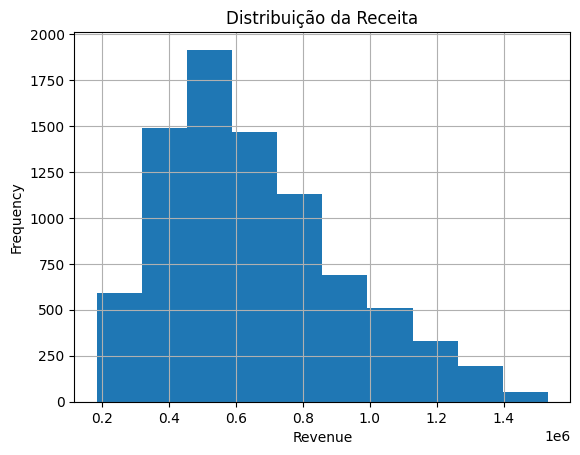

In [74]:
# Análise Exploratória de Dados
df['Revenue'].hist()
plt.title('Distribuição da Receita')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

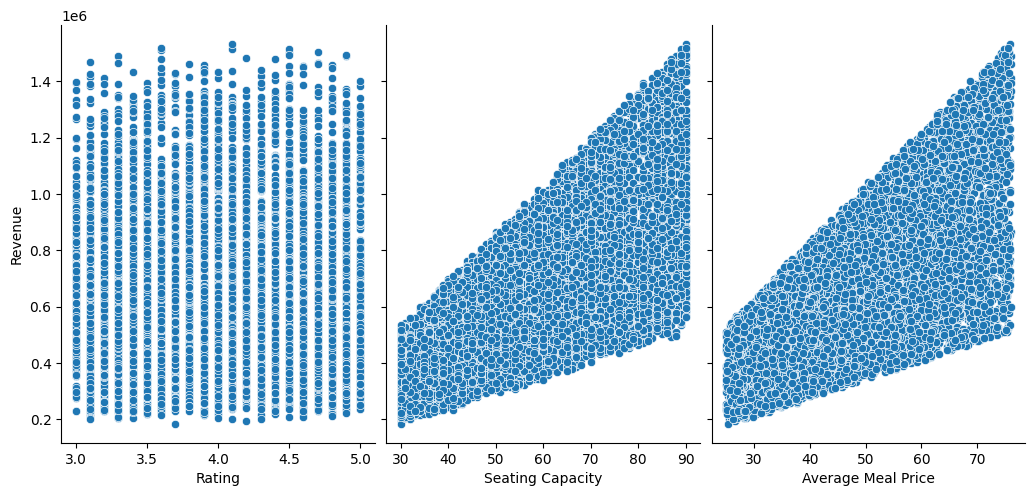

In [75]:
# Gráfico de dispersão para visualizar a relação entre características e receita
sns.pairplot(df, x_vars=['Rating', 'Seating Capacity', 'Average Meal Price'], y_vars='Revenue', height=5, aspect=0.7)
plt.show()

In [76]:

# Normalização das colunas numéricas
numeric_columns = ['Rating', 'Seating Capacity', 'Average Meal Price', 
                   'Marketing Budget', 'Social Media Followers', 
                   'Chef Experience Years', 'Number of Reviews', 
                   'Avg Review Length', 'Ambience Score', 
                   'Service Quality Score', 'Weekend Reservations', 
                   'Weekday Reservations']

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Codificação das variáveis categóricas
encoder = OneHotEncoder()
categorical_columns = ['Location', 'Cuisine', 'Parking Availability']

categorical_features = encoder.fit_transform(df[categorical_columns])
categorical_feature_names = encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.DataFrame(categorical_features.toarray(), columns=categorical_feature_names)  # Convertendo para array e ajustando DataFrame

#  Concatenando os DataFrames codificados ao DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Removendo as colunas originais que foram codificadas
df.drop(columns=categorical_columns, inplace=True)


In [77]:
# Dividir dados
X = df.drop(columns=['Name', 'Revenue'])
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Modelagem
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
# Avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3193598831.241735
R-squared: 0.9554413593451657


In [80]:
# Supondo que 'model' seja o modelo treinado de Regressão Linear
y_pred = model.predict(X_test)

# Exibir as previsões para cada restaurante nos dados de teste
for i, previsao in enumerate(y_pred):
    print(f"Previsão de Receita para Restaurante {i}: ${previsao:.2f}")


Previsão de Receita para Restaurante 0: $462752.55
Previsão de Receita para Restaurante 1: $226963.65
Previsão de Receita para Restaurante 2: $477326.96
Previsão de Receita para Restaurante 3: $931168.40
Previsão de Receita para Restaurante 4: $569803.14
Previsão de Receita para Restaurante 5: $537354.93
Previsão de Receita para Restaurante 6: $473624.51
Previsão de Receita para Restaurante 7: $760607.69
Previsão de Receita para Restaurante 8: $247406.24
Previsão de Receita para Restaurante 9: $1156869.00
Previsão de Receita para Restaurante 10: $510407.19
Previsão de Receita para Restaurante 11: $415070.10
Previsão de Receita para Restaurante 12: $847600.73
Previsão de Receita para Restaurante 13: $240211.70
Previsão de Receita para Restaurante 14: $811125.53
Previsão de Receita para Restaurante 15: $345182.65
Previsão de Receita para Restaurante 16: $704918.41
Previsão de Receita para Restaurante 17: $597626.00
Previsão de Receita para Restaurante 18: $864308.25
Previsão de Receita p